In [1]:
import pandas as pd
import seaborn as sns
%matplotlib inline
import random
import matplotlib.pyplot as plt

BERT = pd.read_json("run-warmup_steps=1000_learning_rate=2e-05_training_steps=5000_runs_BERT-tag-Eval_Top-100.json")
rankfromsets = pd.read_json("run-optimizer_type=RMS_emb_size=10_batch_size=500_learning_rate=0.0001_runs_mean-tag-Eval_Top-100.json")
batch_size_BERT = 32
batch_size_rankfromsets = 500

In [3]:
rankfromsets.rename(columns={0: "rawTime", 1: "step", 2:"performance"}, inplace=True)
rankfromsets['complexity'] = rankfromsets['step'] * batch_size_rankfromsets

BERT.rename(columns={0: "rawTime", 1: "step", 2:"performance"}, inplace=True)
BERT['complexity'] = BERT['step'] * batch_size_BERT

In [ ]:
time_list = [0]
beginning = rankfromsets['rawTime'][0]

for x in range(1, len(rankfromsets['rawTime'])):
    time_list.append(rankfromsets['rawTime'][x]-beginning)

rankfromsets['current_time'] = time_list

time_list = [0]
beginning = BERT['rawTime'][0]

for x in range(1, len(BERT['rawTime'])):
    time_list.append(BERT['rawTime'][x]-beginning)

BERT['current_time'] = time_list

In [24]:
# this is only to cut down to only the period when performance is improving, don't run if you want to keep the whole training process
rankfromsets = rankfromsets.iloc[:22]
BERT = BERT.iloc[:3]

In [24]:
# this just gets the lists of various data parameters so you can pick and choose what to plot
rankfromsets_seconds = list(rankfromsets['current_time'])
BERT_seconds = list(BERT['current_time'])
rankfromsets_performance = list(rankfromsets['performance'])
BERT_performance = list(BERT['performance'])
rankfromsets_complexity = list(rankfromsets['complexity'])
BERT_complexity = list(BERT['complexity'])

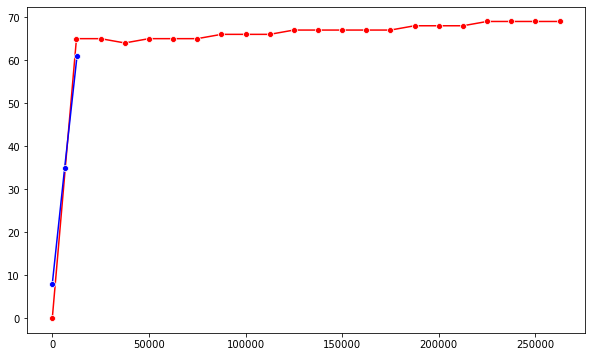

In [24]:
# formatting is upto you
plt.figure(figsize=(10, 6))
plt.ticklabel_format(style='plain', axis='x')
sns.lineplot(x=rankfromsets_seconds, y=rankfromsets_performance, color="red", marker='o')
sns.lineplot(x=BERT_seconds, y=BERT_performance, color="blue", marker='o')